# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [34]:
from pathlib import Path
import pandas as pd

2024-02-05 18:13:36.621 No runtime found, using MemoryCacheStorageManager
2024-02-05 18:13:36.668 No runtime found, using MemoryCacheStorageManager


In [35]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [36]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [37]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [38]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.68,7211.10,1250.00,30196.23,0.00,0.00,0.00,1.00,0.00,...,225.77,56.84,0.30,0.36,1.00,forest,2015,62.55,14.99,1
1,2003-02-17,8721.38,2358.50,250.00,13768.17,0.00,0.00,0.00,0.42,0.00,...,209.71,61.12,0.26,0.02,0.83,forest,2003,60.79,15.05,1
2,2012-02-26,10796.41,0.00,2015.56,6255.00,0.00,0.00,0.00,0.67,0.00,...,76.34,63.02,0.21,0.03,1.00,forest,2012,63.42,15.00,1
3,2004-11-10,8253.79,559.02,0.00,37350.54,0.00,0.00,0.00,0.00,0.00,...,68.56,64.67,0.16,0.00,0.00,wetland,2004,60.39,14.85,1
4,2003-03-19,9905.81,0.00,1903.94,6427.48,0.00,0.00,0.00,0.75,0.00,...,316.95,56.10,0.21,0.12,0.92,forest,2003,69.57,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

In [39]:
!pip install lazypredict


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
from classification.processing import DataProcessor
from classification.model import ModelPredictor

processor = DataProcessor()

X_train, X_test, y_train, y_test = processor.split_data(
    test_size=0.25,
    random_state=0,
    shuffle=True,
    stratify_flag=True,
)

predictor = ModelPredictor(random_state=0)

In [41]:
models, predictions = predictor.lazy_predict(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:30<00:01,  1.15s/it]

[LightGBM] [Info] Number of positive: 2490, number of negative: 14036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6390
[LightGBM] [Info] Number of data points in the train set: 16526, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150672 -> initscore=-1.729343
[LightGBM] [Info] Start training from score -1.729343


100%|██████████| 29/29 [00:30<00:00,  1.06s/it]


In [42]:
model_dict = predictor.provide_models(X_train, X_test, y_train, y_test)
selected_model = model_dict.get("XGBClassifier")

display(selected_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['distance_fire_stations', 'distance_rivers', 'distance_roads',
       'distance_powerlines', 'cropland', 'forest_deciduous_broad',
       'forest_deciduous_needle', 'forest_evergreen_broad',
       'forest_evergreen_needle'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [43]:
fig = predictor.get_classification_report(X_test, y_test, selected_model)

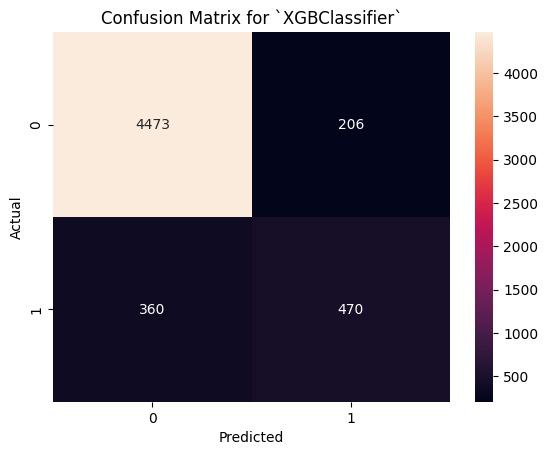

In [44]:
fig = predictor.get_confusion_matrix(X_test, y_test, selected_model)

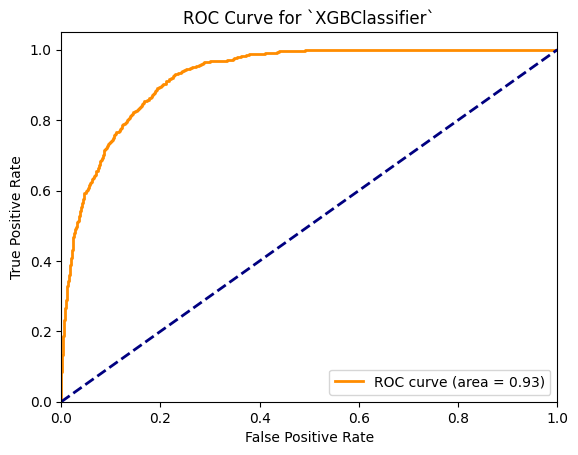

In [45]:
fig = predictor.get_roc_curve(X_test, y_test, selected_model)

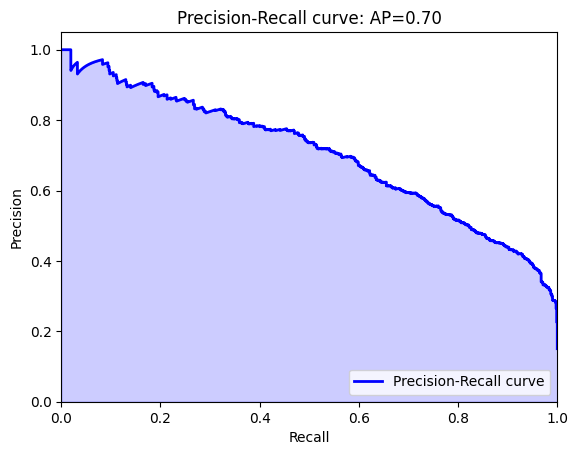

In [46]:
fig = predictor.get_precision_recall_curve(X_test, y_test, selected_model)

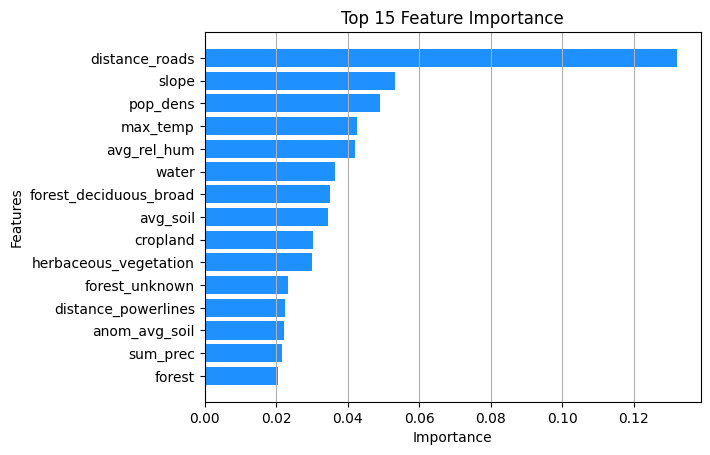

In [47]:
fig = predictor.get_feature_importance(
    selected_model, feature_names=X_test.columns, top_n=15
)